In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
with open('hygdata_v3.csv', 'r') as f:
    lines = f.read().split('\n') # split each line

In [4]:
data = []
for line in lines[1:-1]:
    data.append(line.split(',')) # split each element

In [11]:
ra = [float(data[i][7])*360/24 for i in range(len(data))]
dec = [float(data[i][8]) for i in range(len(data))]
mag = [float(data[i][13]) for i in range(len(data))]
spec = [data[i][15] for i in range(len(data))]
var = [data[i][-3] for i in range(len(data))]
var_min = [data[i][-2] for i in range(len(data))]
var_max = [data[i][-1] for i in range(len(data))]

In [13]:
min(ra), max(ra)

(0.0009000000000000001, 359.97891000000004)

In [14]:
def marker_size(mag, indices):
#     print(len(mag))
    ms = [0] * len(data)
    for i in range(len(mag)):
        if i in indices:
            ms[i] = (10**(-mag[i]/2.5))*1500
#         print(i) # To test speed, turns out this for loop is the cause of latency
#     print('xx')

    return ms

In [15]:
o_ind, b_ind, f_ind, m_ind = [], [], [], []
for i in range(len(spec)):
    if spec[i] == '':
        continue
    elif spec[i][0] == 'O':
        o_ind.append(i)
    elif spec[i][0] == 'B':
        b_ind.append(i)
    elif spec[i][0] == 'F':
        f_ind.append(i)
    elif spec[i][0] == 'M':
        m_ind.append(i)

In [16]:
print(len(o_ind), len(b_ind), len(f_ind), len(m_ind))

264 10413 25602 5240


In [ ]:
fig1 = plt.figure(figsize=(20,12))
plt.style.use(['dark_background'])

ax1 = fig1.add_subplot(221, projection='mollweide')
ax2 = fig1.add_subplot(222, projection='mollweide')
ax3 = fig1.add_subplot(223, projection='mollweide')
ax4 = fig1.add_subplot(224, projection='mollweide')

ax1.scatter(ra, dec, c='white',s=marker_size(mag, o_ind))
ax2.scatter(ra, dec, c='white', s=marker_size(mag, b_ind))
ax3.scatter(ra, dec, c='white',s=marker_size(mag, f_ind))
ax4.scatter(ra, dec, c='white',s=marker_size(mag, m_ind))

ax1.grid(True)
ax2.grid(True)
ax3.grid(True)
ax4.grid(True)

plt.show()

In [9]:
plt.subplot?

In [10]:
plt.plot?

In [11]:
plt.figure?

In [11]:
import requests
page = requests.get('http://astrosat.iucaa.in/czti/?q=grb')

In [12]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(page.content, 'lxml')

In [13]:
y = soup.find_all('table')[0].find_all('tr')
s = []
for i in range(1,len(y)):
    s.append(y[i].find_all('td')[3].get_text())

In [14]:
grb_data = []
for i in range(len(s)):
    l = (s[i].strip('\n').strip('\t').split('\xa0'))
    s[i] = ''
    for j in range(len(l)):
        s[i] += l[j]
    a = []
    if s[i] != '--, --' and s[i] != '' and s[i] != '--':
        a.append(s[i].split(','))
        a = a[0]
        if len(a) != 2:
            continue
        a[0], a[1] = float(a[0]), float(a[1])
        if a[0] > 180.0:
            a[0] = 180.0 - a[0]
        grb_data.append(a)
print(grb_data)

[[-10.900000000000006, 40.2], [-91.69999999999999, -4.4], [-109.5, 38.6], [-127.5, -39.7], [-16.30000000000001, -20.2], [-99.80000000000001, 64.1], [134.2, -38.2], [81.3, 73.3], [22.1, -29.1], [123.4, 59.1], [65.5, -46.3], [-24.0, -49.7], [101.1, -62.0], [-148.0, -46.5], [-164.10000000000002, -60.0], [-165.2, -7.2], [-64.1, -48.3], [-29.97999999999999, 27.56], [139.4, -70.7], [-19.400000000000006, -0.3], [150.1, 64.4], [104.5, 31.7], [-77.39999999999998, -35.1], [145.8, -7.2], [95.5, -17.4], [154.83, -38.14], [-48.849999999999994, -56.52], [-121.07999999999998, -40.27], [-65.30000000000001, 16.8], [8.9, 5.4], [54.3, -32.18], [-34.0, -48.4], [156.1, 11.7], [-89.35000000000002, 46.05], [-102.80000000000001, 55.0], [-36.30000000000001, -40.6], [26.8, 65.7], [36.58, 29.46], [-177.39999999999998, -21.8], [-141.3, -48.9], [-40.30000000000001, 0.9], [-11.199999999999989, -58.8], [-71.81, 27.23], [-99.27999999999997, -43.44], [-12.800000000000011, -38.7], [121.1, -75.4], [-27.80000000000001, 1

In [15]:
c1, c2, c3, c4 = 0, 0, 0, 0
for i in range(len(data)):
    if var[i] != '' and var_max[i] == '':
        c1 += 1;
    elif var[i] == '' and var_max[i] != '':
        c2 += 1;
    elif var[i] != '' and var_max[i] != '':
        c3 += 1;
    elif var[i] == '' and var_max[i] == '':
        c4 += 1

print(c1, c2, c3, c4)
# print(var_max)
# print([var[i] + var_max[i] for i in range(len(data))])

9 11010 5981 102613


In [16]:
indices = []
for i in range(len(data)):
    if var[i] == '' and var_max[i] == '':
        continue
    else:
        indices.append(i)

# print(indices)
len(indices)

17000

In [17]:
ra_new = [ra[i] for i in indices]
dec_new = [dec[i] for i in indices]

In [18]:
for item in grb_data:
    ra_new.append(item[0]*(np.pi/180))
    dec_new.append(item[1]*(np.pi/180))
print(dec_new[-2])

-0.19128808601857852


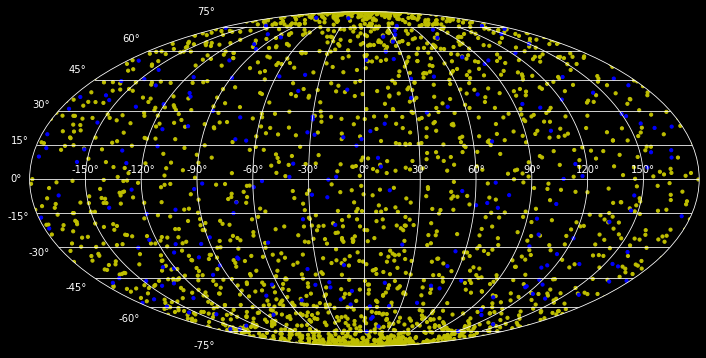

In [19]:
fig1 = plt.figure(figsize=(12,8))
plt.style.use(['dark_background'])

ax = fig1.add_subplot(111, projection='mollweide')
ax.grid(True)

color = ['y']*len(ra_new)
for i in range(len(indices), len(ra_new)):
    color[i] = 'b'

ax.scatter(ra_new, dec_new, s=10, c=color)

plt.show()